In [9]:
!pip install psycopg2-binary

In [28]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

# Remplacer avec vos informations de connexion
hostname = 'postgresql-mia17-hackaton.alwaysdata.net'
username = 'mia17-hackaton'
password = 'hackaton-mia17'
database = 'mia17-hackaton_psql'

# Établir la connexion
conn = psycopg2.connect(
    host=hostname,
    user=username,
    password=password,
    dbname=database
)

# Utiliser pandas pour lire les données depuis la base de données
query = "SELECT * FROM cleaned_olympic_data;"
cleaned_olympic_data_df = pd.read_sql_query(query, conn)

# Afficher les premières lignes du DataFrame
print(cleaned_olympic_data_df.head(500))


    country_name  game_year  BRONZE  GOLD  SILVER  total_medals  \
0    Afghanistan       2008       1     0       0             1   
1    Afghanistan       2012       1     0       0             1   
2        Algeria       1984       2     0       0             2   
3        Algeria       1992       1     1       0             2   
4        Algeria       1996       1     2       0             3   
..           ...        ...     ...   ...     ...           ...   
495       France       1968       7    11       6            24   
496       France       1972       9     2       5            16   
497       France       1976       5     2       3            10   
498       France       1980       4     6       5            15   
499       France       1984      18     5       8            31   

     total_disciplines  total_events  
0                    1             2  
1                    3             4  
2                    4            12  
3                    8            29  


/Users/barrysalam/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [18]:
print("Colonnes de cleaned_olympic_data :", cleaned_olympic_data_df.columns)

Colonnes de cleaned_olympic_data : Index(['country_name', 'game_year', 'BRONZE', 'GOLD', 'SILVER', 'total_medals',
       'total_disciplines', 'total_events'],
      dtype='object')


In [19]:
cleaned_olympic_data_df.shape

(1560, 8)

In [20]:
cleaned_olympic_data_df.isnull().sum()

country_name         0
game_year            0
BRONZE               0
GOLD                 0
SILVER               0
total_medals         0
total_disciplines    0
total_events         0
dtype: int64

Country Gold_2024_LR Silver_2024_LR Bronze_2024_LR
 France         12.0            6.0            5.0
    USA         39.0           41.0           33.0
  China         38.0           32.0           18.0
Germany         10.0           11.0            9.0


/var/folders/6c/2p4t32h968ldf5t9b7vybr300000gn/T/ipykernel_49889/2295857550.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({
/var/folders/6c/2p4t32h968ldf5t9b7vybr300000gn/T/ipykernel_49889/2295857550.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({
/var/folders/6c/2p4t32h968ldf5t9b7vybr300000gn/T/ipykernel_49889/2295857550.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_df = predictions_df.append({
/var/folders/6c/2p4t32h968ldf5t9b7vybr300000gn/T/ipykernel_49889/2295857550.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predi

In [33]:
# Filter data for France
france_medals = cleaned_olympic_data_df[cleaned_olympic_data_df['country_name'] == 'France']
france_medals

,country_name,game_year,BRONZE,GOLD,SILVER,total_medals,total_disciplines,total_events
480,France,1896,2,5,4,11,7,20
481,France,1900,35,26,36,97,15,176
482,France,1904,0,0,1,1,1,1
483,France,1908,9,5,5,19,13,57
484,France,1912,3,7,4,14,13,51
485,France,1920,12,9,19,40,25,87
486,France,1924,13,13,15,41,31,114
487,France,1928,5,7,10,22,26,87
488,France,1932,4,11,5,20,17,51
489,France,1936,7,7,5,19,25,83


In [34]:
# Calculate the total number of gold, silver, and bronze medals
total_gold = france_medals['GOLD'].sum()
total_silver = france_medals['SILVER'].sum()
total_bronze = france_medals['BRONZE'].sum()

print(f"Total gold medals won by France: {total_gold}")
print(f"Total silver medals won by France: {total_silver}")
print(f"Total bronze medals won by France: {total_bronze}")

Total gold medals won by France: 261
Total silver medals won by France: 289
Total bronze medals won by France: 329


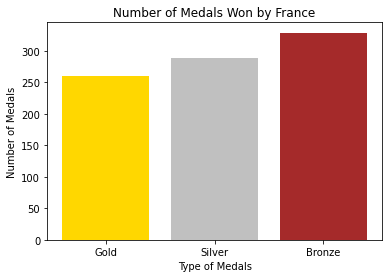

In [35]:
# Visualize the results with a bar chart
medals = ['Gold', 'Silver', 'Bronze']
totals = [total_gold, total_silver, total_bronze]

plt.bar(medals, totals, color=['gold', 'silver', 'brown'])
plt.xlabel('Type of Medals')
plt.ylabel('Number of Medals')
plt.title('Number of Medals Won by France')
plt.show()

In [37]:

# Calculer le total des médailles pour chaque pays
total_medals_by_country = cleaned_olympic_data_df.groupby('country_name').sum()
total_medals_by_country

,game_year,BRONZE,GOLD,SILVER,total_medals,total_disciplines,total_events
country_name,,,,,,,
Afghanistan,4020,2,0,0,2,4,6
Algeria,14008,8,5,4,17,66,204
Argentina,39476,30,21,26,77,363,1024
Armenia,12052,8,2,8,18,44,129
Australasia,3820,5,3,4,12,9,35
...,...,...,...,...,...,...,...
Uzbekistan,16050,19,11,6,36,87,340
Venezuela,21880,9,3,7,19,128,374
Vietnam,6024,0,1,3,4,19,39


In [39]:
# Sélectionner les 25 pays avec le plus grand nombre de médailles
top_25_countries = total_medals_by_country.nlargest(25, 'total_medals')
top_25_countries 

,game_year,BRONZE,GOLD,SILVER,total_medals,total_disciplines,total_events
country_name,,,,,,,
United States of America,72920,831,1171,954,2956,924,5002
Russia,55632,628,751,632,2011,692,3853
Germany,67128,602,596,608,1806,835,4265
Great Britain,72920,329,294,321,944,775,3489
France,72920,329,261,289,879,835,3698
Italy,69120,268,258,229,755,813,3353
People's Republic of China,36084,196,284,231,711,391,1947
Sweden,69120,238,208,225,671,687,2585
Japan,61452,209,186,177,572,696,2802


In [40]:
# Calculer le nombre de médailles d'or, d'argent et de bronze pour ces 25 pays
top_25_gold = top_25_countries['GOLD'].sum()
top_25_silver = top_25_countries['SILVER'].sum()
top_25_bronze = top_25_countries['BRONZE'].sum()

In [41]:

print(f"Total des médailles d'or gagnées par le Top 25 des pays : {top_25_gold}")
print(f"Total des médailles d'argent gagnées par le Top 25 des pays : {top_25_silver}")
print(f"Total des médailles de bronze gagnées par le Top 25 des pays : {top_25_bronze}")

Total des médailles d'or gagnées par le Top 25 des pays : 5830
Total des médailles d'argent gagnées par le Top 25 des pays : 5627
Total des médailles de bronze gagnées par le Top 25 des pays : 5816


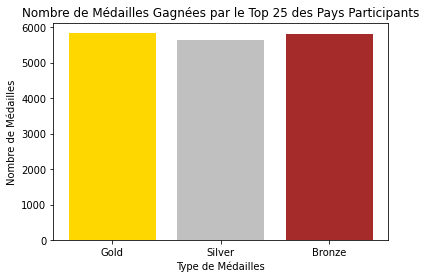

In [42]:
# Visualiser les résultats avec un graphique
medals = ['Gold', 'Silver', 'Bronze']
totals = [top_25_gold, top_25_silver, top_25_bronze]

plt.bar(medals, totals, color=['gold', 'silver', 'brown'])
plt.xlabel('Type de Médailles')
plt.ylabel('Nombre de Médailles')
plt.title('Nombre de Médailles Gagnées par le Top 25 des Pays Participants')
plt.show()
